<a href="https://colab.research.google.com/github/tutsilianna/Introduction_to_ML_and_Advanced_ML_Python/blob/main/kNN%20and%20Naive%20Bayes/Classifiers_k_NN_and_Naive_Bayes_%7C_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

In problems, use the implementation of the k-nn method from the sklearn library:

`from sklearn.neighbors import KNeighborsClassifier`

The parameters that may be needed are: `n_neighbors` - the number of neighbors; `p `is a parameter in the Minkowski distance (`p = 1` corresponds to the Manhattan distance, `p = 2` corresponds to the Euclidean one).

## **Task1**



A table of some synthetic data is given. You must classify the new object using the $k$-nearest neighbor method.

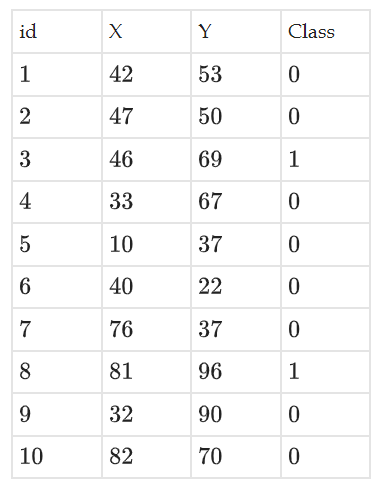

> Enter the distance from the new object with coordinates $(67,95)$  to the nearest neighbor using the Euclidean metric.

> Enter the id of the three nearest points to $(67,95)$ for the Euclidean metric.

> Enter a class for the new object with coordinates $(67,95)$ given $k=3$ for the Euclidean metric.

> Enter the distance from the new object with coordinates $(67,95)$ to the nearest neighbor using the Manhattan distance.

> Enter the id of the three nearest points to $(67,95)$ for the Manhattan distance.

> Enter a class for the new object with coordinates $(67,95)$ given $k=3$ for the Manhattan distance.

In [ ]:
X = [42,47,46,33,10,40,76,81,32,82]
Y = [53,50,69,67,37,22,37,96,90,70]
points = [[42, 53],
          [47,50],
          [46, 69],
          [33, 67],
          [10, 37],
          [40, 22],
          [76,37],
          [81,96],
          [32,90],
          [82,70]]

Class = [0,0,1,0,0,0,0,1,0,0]

In [ ]:
import numpy as np

def distanceEv(x, y):
    return np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)

def distanceMan(x, y):
    return np.abs(x[0]-y[0]) + np.abs(x[1]-y[1])

In [ ]:
new = [67, 95]
r = 10000
ind = 0
dist = {}
for i in range(len(points)):
    r1 = distanceEv(new, points[i])
    dist[i+1] = round(r1, 3)
    if r > r1:
        r = r1
        ind = i
print(f'Nearest neighbor for a new object with coordinates (67, 95): ({points[i][0]}, {points[i][1]})  r={round(r,3)}')

Nearest neighbor for a new object with coordinates (67, 95): (82, 70)  r=14.036


In [ ]:
sorted_dist = sorted(dist.items(), key=lambda item: item[1])
print(sorted_dist)
i = sorted_dist[0][0]
j = sorted_dist[1][0]
k = sorted_dist[2][0]
print(Class[i-1], Class[j-1], Class[k-1])
print('Class new object (67, 95) = 1')

[(8, 14.036), (10, 29.155), (3, 33.422), (9, 35.355), (4, 44.045), (1, 48.877), (2, 49.244), (7, 58.694), (6, 77.833), (5, 81.32)]
1 0 1
Class new object (67, 95) = 1


In [ ]:
new = [67, 95]
r = 10000
ind = 0
dist = {}
for i in range(len(points)):
    r1 = distanceMan(new, points[i])
    dist[i+1] = round(r1, 3)
    if r > r1:
        r = r1
        ind = i
print(f'Nearest neighbor for a new object with coordinates (67, 95): ({points[i][0]}, {points[i][1]})  r={round(r,3)}')

Nearest neighbor for a new object with coordinates (67, 95): (82, 70)  r=15


In [ ]:
sorted_dist = sorted(dist.items(), key=lambda item: item[1])
print(sorted_dist)
i = sorted_dist[0][0]
j = sorted_dist[1][0]
k = sorted_dist[2][0]
print(Class[i-1], Class[j-1], Class[k-1])
print('Class new object (67, 95) = 0')

[(8, 15), (9, 40), (10, 40), (3, 47), (4, 62), (2, 65), (1, 67), (7, 67), (6, 100), (5, 115)]
1 0 0
Class new object (67, 95) = 0


## **Task 2**

### A bit about model quality metrics

First, let's look at the so-called confusion matrix -- a way to divide objects into $4$ groups depending on the combination of the true class and the classifier prediction:

-   TP (True Positives) -- correctly classified objects originally belonging to the class "$+1$";

-   TN (True Negatives) -- correctly classified objects originally belonging to the class "$-1$";

-   FN (False Negatives) -- misclassified objects that originally belonged to the class "$+1$" (type I error);

-   FP (False Positives) -- misclassified objects that originally belonged to the class "$-1$" (type II error).

Usually, of course, it is not absolute rates that are used, but relative ones (rates), ranging from $0$ to $1$:

-   proportion of correct classifier predictions (so-called accuracy): $$\mathsf{Accuracy} = \frac{TP + TN}{TP + FP + FN + TN}.$$ This value shows the ratio of the number of correctly classified objects to the total number of classified objects and, roughly speaking, estimates the probability of a random object to be correctly classified.

-   proportion of true positive predictions -- True Positives Rate (TPR), or Sensitivity, or Recall: $$\mathsf{T P R}=\frac{T P}{T P+F N}.$$ This value shows the ratio of the number of correctly classified objects belonging to class "$+1$" to the total number of objects belonging to class "$+1$". In other words, it is an estimate of the probability that an object belonging to class "$+1$" will be correctly classified.

-   proportion of false positive predictions -- False Positives Rate (FPR): $$\mathsf{F P R}=\frac{F P}{FP + TN}.$$ The value indicates the ratio of the number of misclassified objects belonging to class "$-1$" to the total number of objects of class "$-1$", or estimates the probability that an object belonging to class "$-1$" will be misclassified.

-   Specificity or True Negatives Rate (TNR): $$\mathsf{TNR} = 1 - \mathsf{F P R} =\frac{T N}{T N+F P}.$$ The value indicates the ratio of the number of correctly classified objects belonging to class "$-1$" to the total number of objects of class "$-1$", or estimates the probability that an object belonging to class "$-1$" will be classified correctly.

-   Precision: $$\mathsf{Precision} =\frac{TP}{TP + FP}.$$ The value indicates what proportion of objects assigned to the "$+1$" class by the classifier actually belong to this class.

The question that naturally arises is whether there is some generalizable criterion,
that can characterize the quality of the model. One of them is
the so-called $F$-measure ($F_1$-measure, $F$ score, $F_1$ score).
is defined by the following relationship:
$$F = F_1 = 2 \cdot \frac{\mathsf{Precision} \cdot \mathsf{Recall}}{\mathsf{Precision} + \mathsf{Recall}}.$$

**Remark**. *The $F$-measure is the harmonic mean of the values
$\mathsf{Precision}$ and $\mathsf{Recall}$ and is in the range of
$[0, 1]$. The harmonic mean has an important property: it is close to
zero if at least one of the arguments is close to zero. Therefore, it is
much more preferable than, say, the arithmetic mean: if the
algorithm assigns all objects to a positive class, then
$\mathsf{Recall}= 1$, and $\mathsf{Precision}$ is likely to be
small. But then the arithmetic mean will be greater than $0.5$, which, of course, is just too bad.*

[The provided dataset](https://drive.google.com/file/d/1CEHmYbLl-rTw2noXfKTdzPu2_Jte6U19/view?usp=sharing) comes from the 1994 census and contains information about a certain number of people living in the United States. The problem is to predict whether or not a person earns more than $50k per year. List of features:

*   <b>age</b>: age of a person.
*   <b>workclass</b>: the employment status of an individual.
*   <b>fnlwgt</b>: final weight, representing the number of individuals that this row represents (a representative sample).
*   <b>education</b>: highest level of education achieved by an individual.
*   <b>education-num</b>: highest level of education achieved by an individual in numerical form.
*   <b>marital-status</b>: marital status of an individual. Note that Married-civ-spouse refers to a civilian spouse, and Married-AF-spouse refers to a spouse in the Armed Forces.
*   <b>occupation</b>: general type of occupation of an individual.
*   <b>relationship</b>: relationship of this individual with others, for example, spouse (Husband). Each data point has only one relationship (echoing the <b>marital-status</b> feature).
*   <b>race</b>: race.
*   <b>sex</b>: biological sex of an individual.
*   <b>capital-gain</b>: capital gains of an individual.
*   <b>capital-loss</b>: capital losses of an individual.
*   <b>hours-per-week</b>: number of hours the individual reported working per week.
*   <b>native-country</b>: country of origin.
*   <b>label</b>: income (target), more than $50,000 (>50K) or not (<=50K).



### Importing libraries and reading the dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the dataset into a dataframe. Based on the description of the features, you can get rid of the features education и marital-status right away. Remove the corresponding columns from the dataset.

In [6]:
data = pd.read_csv('/content/drive/MyDrive/itmo|AI_cources/adult_data_train.csv', encoding = 'utf-8', delimiter=',')

Remove the corresponding columns from the dataset. Determine the number of numeric and non-numeric features.

In [7]:
data.drop(axis=1, columns=['marital-status', 'education'], inplace=True)

Determine the number of numeric and non-numeric features.

In [8]:
categorical = [i for i in data.columns if data[i].dtype.name == 'object']
numeric = [i for i in data.columns if data[i].dtype.name != 'object']
print(f'count non-numeric feauters {len(categorical)}, \ncount numeric feauters {len(numeric)}')

count non-numeric feauters 6, 
count numeric feauters 7


Construct a histogram of the objects distribution by classes. Calculate the proportion of objects in the class  0 .

In [9]:
data_0 = len(data[data['label'] == 0])
round(data_0/len(data), 3)

0.759

## 1. Building a base model

As a first approximation, it makes sense to build a classification model relying solely on numerical features.

Select only numerical features from the dataset. Use <code>train_test_split()</code> to split the dataset into training and test samples <b>with the parameters specified in your assignment</b>. Use stratification by column <code>label</code>.

Find sample mean for the column <code>fnlwgt</code> of the obtained training dataset.

Train <code>KNeighborsClassifier()</code> model with default parameters on the training dataset.

As can be seen from the previous step, there is a clear imbalance of class representatives in the dataset. This should be taken into account when evaluating the model. Compute <code>f1_score()</code> for the test dataset (we recommend to use a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html">corresponding function</a> with default parameters).

Alternatively, you can use the so-called <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html"><code>classification_report()</code></a>, where several metrics are given at once (do not forget about the parameter <code>digits</code>).

In [10]:
data_numeric = data.copy(deep=True)
data_numeric.drop(axis=1, columns=categorical, inplace=True)

In [11]:
train, test = train_test_split(data_numeric, test_size=0.2, random_state=21, stratify=data['label'])

In [12]:
y_train = train['label']
y_test  = test['label']

In [13]:
train.drop(axis=1, columns=['label'], inplace=True)
test.drop(axis=1, columns=['label'], inplace=True)

In [14]:
print(f'Sample mean for the column "fnlwgt" = {round(train["fnlwgt"].mean(), 3)}')

Sample mean for the column "fnlwgt" = 189611.447


In [15]:
neigh = KNeighborsClassifier()
neigh.fit(train, y_train)

KNeighborsClassifier()

In [16]:
y_pred = neigh.predict(test)
round(f1_score(y_test, y_pred), 3)

0.38

**Feature scaling**

It is worth remembering that k-NN is a metric classifier, so feature values should be normalized before training the model.

Train the <code>MinMaxScaler()</code> transformation on the training dataset and apply it to the training and test datasets.

Find sample mean for the column <code>fnlwgt</code> of the obtained training dataset after normalization.

Re-train and evaluate the model on the transformed data. Compute <code>f1_score()</code> for the test dataset.

In [19]:
scaler = MinMaxScaler().fit(train)

x_train = scaler.transform(train)
x_test = scaler.transform(test)

In [ ]:
'''scaler = MinMaxScaler().set_output(transform="pandas")

train_scaler = train.copy()
train_scaler = scaler.fit_transform(train_scaler)
train_scaler.head()'''

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
11656,0.150685,0.128014,0.866667,0.0,0.0,0.397959
17737,0.082192,0.181306,0.600000,0.0,0.0,0.397959
4385,0.123288,0.057173,0.800000,0.0,0.0,0.397959
23298,0.397260,0.246798,0.466667,0.0,0.0,0.346939
3265,0.191781,0.089042,0.600000,0.0,0.0,0.346939


In [18]:
'''test_scaler = test.copy()
test_scaler = scaler.fit_transform(test_scaler)'''

In [22]:
x_train_for_plot = pd.DataFrame(x_train, columns = train.columns)
x_test_for_plot = pd.DataFrame(x_test, columns = test.columns)

print(f'Sample mean for the column "fnlwgt" = {round(x_train_for_plot["fnlwgt"].mean(), 3)}')

Sample mean for the column "fnlwgt" = 0.12


Train the `KNeighborsClassifier()` model with default parameters on the training dataset. Evaluate the model on test dataset.

Compute `f1_score()` for the test dataset.

In [23]:
'''neigh_scaler = KNeighborsClassifier()
neigh_scaler.fit(train_scaler, y_train)

y_pred_scaler = neigh_scaler.predict(test_scaler)
round(f1_score(y_test, y_pred_scaler), 3)'''


neigh_scaler = KNeighborsClassifier()
neigh_scaler.fit(x_train, y_train)

y_pred_scaler = neigh_scaler.predict(x_test)
round(f1_score(y_test, y_pred_scaler), 3)

0.506

It can be seen that the quality has increased after linear normalization.

<b>Important:</b> Further steps involve using linear normalization immediately before training without additional reminders.

## 2. Working with non-numeric features

### Visualization

To further improve the quality of the model, it makes sense to leverage the non-numeric attributes of the original dataset (without columns <code>education</code> and <code>marital-status</code>).

Construct histograms illustrating the frequency of a particular value for each non-numeric feature, e.g., using <code>sns.barplot()</code>.

In [24]:
data_vis = data[['workclass', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'label']].copy(deep=True)

In [25]:
data_vis['race'].value_counts()

White                 22283
Black                  2462
Asian-Pac-Islander      839
Amer-Indian-Eskimo      238
Other                   226
Name: race, dtype: int64

### Removing missing values

Determine the number of rows in the original dataset (without columns <code>education</code> and <code>marital-status</code>) that contain at least one missing value.

In [26]:
data = data.replace(['?'], None)

In [27]:
data_notnull = data.copy(deep=True)
data_notnull.dropna(axis=0, how='any', inplace=True)

In [28]:
len(data) - len(data_notnull)

1914

You can see that the dataset contains less than 10% of rows that contain missing values. Throwing out such a large number of rows is not a good thing, but why not try to train model without them.

Remove rows containing missing values. Perform <code>one-hot</code> encoding of non-numeric features, e.g., using <code>pd.get_dummies(drop_first=True)</code>.

Enter the total number of features obtained.

In [29]:
data1 = pd.get_dummies(data_notnull, drop_first=True)
data1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,32,37210,13,0,0,45,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,43,101950,14,0,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,40,24763,10,6849,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,24,113936,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,51,237630,9,7298,0,50,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Using the resulting dataset, train the classification model in the same way as was done for the baseline model. Compute <code>f1_score()</code> for the test dataset.



In [30]:
train1, test1 = train_test_split(data1, test_size=0.2, random_state=21, stratify=data1['label'])

In [31]:
y_train1 = train1['label']
y_test1 = test1['label']
train1.drop(axis=1, columns=['label'], inplace=True)
test1.drop(axis=1, columns=['label'], inplace=True)

In [32]:
scaler1 = MinMaxScaler().fit(train1)

x_train1 = scaler1.transform(train1)
x_test1 = scaler1.transform(test1)

In [33]:
x_train1_for_plot = pd.DataFrame(x_train1, columns = train1.columns)
x_test1_for_plot = pd.DataFrame(x_test1, columns = test1.columns)

In [35]:
neigh1 = KNeighborsClassifier()
neigh1.fit(x_train1, y_train1)

y_pred_1 = neigh1.predict(x_test1)
round(f1_score(y_test1, y_pred_1), 3)

0.592

The quality of the model increased compared to the model that used only numerical features.

### Filling missing values

Perhaps the quality would be further improved by using rows with missing values. Using the original dataset (without columns <code>education</code> and <code>marital-status</code>), fill the missing values with the most frequent value within the column.

The next scenario is the familiar one: <code>one-hot</code>, <code>split</code>, <code>scaling</code>, training, and evaluation.

Compute the <code>f1_score()</code> of the model.

### Curse of dimensionality

The last step yielded a dataset containing 76 features (by the way, try to explain why the number of features ended up being 75 when the rows were removed), which is enough to face the so-called curse of dimensionality.

In order for the classifier to produce better results, it makes sense to work more carefully and thoughtfully with the features, taking into account the curse of dimensionality. For example, to bring the features <code>education-num</code> and <code>marital-status</code> back into consideration. And also to go deeper into the nature of the features themselves.

## Task 3

Table contains data about the classification of emails into SPAM and HAM and the total number of words included in these groups:

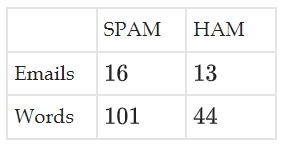

Second table shows data about unique words and number of their occurrences in the aforementioned groups:

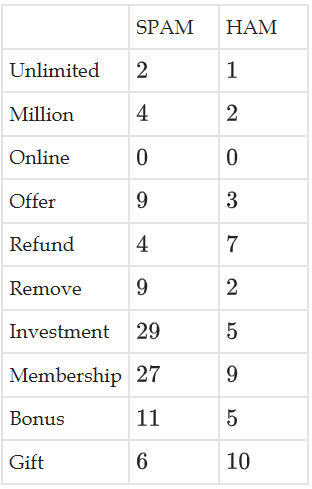

Identify the most probable class of the email containing the following text:

`Access Cash Remove Refund Million Investment Bonus`



> Specify the probability that the email is SPAM based on the training set:


In [ ]:
email_spam = 16
email_no_spam = 13

P_spam = email_spam/(email_spam + email_no_spam)
round(P_spam, 3)

0.552

> Calculate $F(spam)$:

In [ ]:
from numpy import log, exp

In [ ]:
def probability(count, y):
    words_spam = 101
    words_no_spam = 44

    if y == 1: # spam
        return (1 + count)/(10 + 2 + words_spam)
    elif y == 0: # no spam
        return  (1 + count)/(10 + 2 + words_no_spam)

F_spam = log(P_spam) + log(probability(9, 1)) + log(probability(4, 1)) + log(probability(4, 1)) + log(probability(29, 1)) + log(probability(11, 1))
F_spam += 2*log(probability(0, 1))
round(F_spam,3)

-22.279

> Calculate $F(ham)$:

In [ ]:
P_ham = email_no_spam/(email_spam + email_no_spam)

F_ham = log(P_ham) + log(probability(2, 0)) + log(probability(7, 0)) + log(probability(2, 0)) + log(probability(5, 0)) + log(probability(5, 0))
F_ham += 2*log(probability(0, 0))
round(F_ham, 3)

-21.12

> Specify the probability $P(Class = Yes|Email)$ that the email **Access Cash Remove Refund Million Investment Bonus** is SPAM.

In [ ]:
P_email_spam = 1 / (1 + exp(-F_spam + F_ham))
round(P_email_spam, 3)

0.268